In [1]:
# import required lib

import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import seaborn as sns
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the file 
# this data has been randomised in Excel 

#data = pd.read_csv("/content/PET10features.csv")

## new selection 
data = pd.read_csv("/content/LDPEselected.csv")

data

,Unnamed: 0,percentage,1072,347,776,329,769,763,761,765,782,338,372,337,1056,783,768
0,0,1.7,0.472882,0.110611,0.433775,0.184851,0.431714,0.429678,0.429107,0.430289,0.435069,0.146554,0.109438,0.115777,0.467323,0.435339,0.431449
1,1,1.5,0.400041,0.080483,0.366263,0.057062,0.364453,0.362647,0.362354,0.363272,0.367271,0.104324,0.084194,0.078132,0.396698,0.367447,0.364257
2,2,2.5,0.524748,0.140116,0.477189,0.283799,0.474945,0.472692,0.471864,0.473520,0.479182,0.182713,0.125918,0.168431,0.520049,0.479449,0.474477
3,3,9.5,0.344363,0.085775,0.314590,0.084912,0.312797,0.311131,0.310572,0.311725,0.315688,0.075803,0.065040,0.082381,0.339404,0.315867,0.312683
4,4,7.0,0.298862,0.078383,0.271202,0.075044,0.269788,0.268244,0.267481,0.268685,0.272144,0.105047,0.063617,0.118849,0.295147,0.272408,0.269475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,0.3,0.390363,0.120756,0.392951,0.296613,0.396273,0.396031,0.395558,0.396471,0.386936,0.182412,0.079302,0.169838,0.380575,0.385789,0.396431
226,226,8.0,0.345806,0.107554,0.318244,0.123015,0.316431,0.314547,0.314121,0.315069,0.319269,0.091794,0.085298,0.123539,0.335825,0.319435,0.316170
227,227,1.2,0.352900,0.063521,0.310057,0.066840,0.308149,0.306034,0.305524,0.306780,0.311147,0.037708,0.064524,0.034167,0.345630,0.311277,0.307568
228,228,0.7,0.426328,0.192700,0.418059,0.506438,0.421686,0.421385,0.420982,0.422101,0.411887,0.298953,0.103187,0.293630,0.413536,0.410640,0.422109


In [3]:
data.shape

(230, 17)

In [4]:
print(data.dtypes)

Unnamed: 0      int64
percentage    float64
1072          float64
347           float64
776           float64
329           float64
769           float64
763           float64
761           float64
765           float64
782           float64
338           float64
372           float64
337           float64
1056          float64
783           float64
768           float64
dtype: object


In [5]:
# drop unnecessary columns 
# i.e., "unnammed column"
# alt: drop manually in Excel 

useful = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] 

train = data.iloc[:,useful]

train

,1072,347,776,329,769,763,761,765,782,338,372,337,1056,783,768
0,0.472882,0.110611,0.433775,0.184851,0.431714,0.429678,0.429107,0.430289,0.435069,0.146554,0.109438,0.115777,0.467323,0.435339,0.431449
1,0.400041,0.080483,0.366263,0.057062,0.364453,0.362647,0.362354,0.363272,0.367271,0.104324,0.084194,0.078132,0.396698,0.367447,0.364257
2,0.524748,0.140116,0.477189,0.283799,0.474945,0.472692,0.471864,0.473520,0.479182,0.182713,0.125918,0.168431,0.520049,0.479449,0.474477
3,0.344363,0.085775,0.314590,0.084912,0.312797,0.311131,0.310572,0.311725,0.315688,0.075803,0.065040,0.082381,0.339404,0.315867,0.312683
4,0.298862,0.078383,0.271202,0.075044,0.269788,0.268244,0.267481,0.268685,0.272144,0.105047,0.063617,0.118849,0.295147,0.272408,0.269475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.390363,0.120756,0.392951,0.296613,0.396273,0.396031,0.395558,0.396471,0.386936,0.182412,0.079302,0.169838,0.380575,0.385789,0.396431
226,0.345806,0.107554,0.318244,0.123015,0.316431,0.314547,0.314121,0.315069,0.319269,0.091794,0.085298,0.123539,0.335825,0.319435,0.316170
227,0.352900,0.063521,0.310057,0.066840,0.308149,0.306034,0.305524,0.306780,0.311147,0.037708,0.064524,0.034167,0.345630,0.311277,0.307568
228,0.426328,0.192700,0.418059,0.506438,0.421686,0.421385,0.420982,0.422101,0.411887,0.298953,0.103187,0.293630,0.413536,0.410640,0.422109


In [6]:
# drop unnecessary columns 
# i.e., "unnammed column"
# alt: drop manually in Excel 

useful = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] 

train = data.iloc[:,useful]

train

,1072,347,776,329,769,763,761,765,782,338,372,337,1056,783,768
0,0.472882,0.110611,0.433775,0.184851,0.431714,0.429678,0.429107,0.430289,0.435069,0.146554,0.109438,0.115777,0.467323,0.435339,0.431449
1,0.400041,0.080483,0.366263,0.057062,0.364453,0.362647,0.362354,0.363272,0.367271,0.104324,0.084194,0.078132,0.396698,0.367447,0.364257
2,0.524748,0.140116,0.477189,0.283799,0.474945,0.472692,0.471864,0.473520,0.479182,0.182713,0.125918,0.168431,0.520049,0.479449,0.474477
3,0.344363,0.085775,0.314590,0.084912,0.312797,0.311131,0.310572,0.311725,0.315688,0.075803,0.065040,0.082381,0.339404,0.315867,0.312683
4,0.298862,0.078383,0.271202,0.075044,0.269788,0.268244,0.267481,0.268685,0.272144,0.105047,0.063617,0.118849,0.295147,0.272408,0.269475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.390363,0.120756,0.392951,0.296613,0.396273,0.396031,0.395558,0.396471,0.386936,0.182412,0.079302,0.169838,0.380575,0.385789,0.396431
226,0.345806,0.107554,0.318244,0.123015,0.316431,0.314547,0.314121,0.315069,0.319269,0.091794,0.085298,0.123539,0.335825,0.319435,0.316170
227,0.352900,0.063521,0.310057,0.066840,0.308149,0.306034,0.305524,0.306780,0.311147,0.037708,0.064524,0.034167,0.345630,0.311277,0.307568
228,0.426328,0.192700,0.418059,0.506438,0.421686,0.421385,0.420982,0.422101,0.411887,0.298953,0.103187,0.293630,0.413536,0.410640,0.422109


In [8]:

labels = data['percentage'].values 

labels

array([ 1.7,  1.5,  2.5,  9.5,  7. ,  3. ,  8.5,  1. ,  0.1, 12.5,  4.5,
        0.2,  5.5, 15. ,  0.8,  0.7,  4. ,  0.8,  9.5,  1.1,  1.9,  4.5,
       10.5,  6.5,  0.1,  1.6,  0.6,  5. ,  2. ,  0.5,  0.4,  1.1,  4.5,
        1.1,  8. , 13.5,  1. ,  0.1,  5.5, 14.5,  2.5,  0.9,  1.3,  1.4,
       12.5, 10.5,  0.4, 12. ,  7. , 11. ,  0.4, 11. ,  0.9,  4. ,  1.7,
        1.3,  8.5, 11. , 11. ,  1.4,  1.2,  0.9,  1.4,  5.5, 10. ,  0.3,
        1.3, 15. ,  1.1,  0.8,  4. ,  9. ,  1. ,  9.5, 10.5,  0.2,  0.7,
        0.5,  0.3,  7.5,  3. ,  0.3,  9. ,  1.3,  2.5, 14.5,  0.6,  7. ,
        0.5,  0.4,  1.7,  1.8,  3.5,  2. ,  0.2,  5. ,  2. ,  8. ,  3.5,
       13.5,  6.5, 13. , 13.5, 12.5,  9.5,  1.9,  1.2,  2. ,  2. ,  7.5,
        8. ,  0.9, 13. ,  1.6,  1.9, 13.5,  3. ,  3. , 11.5,  1.8,  8.5,
        1.3,  1.2, 13.5, 10. , 15. ,  1.7,  7.5,  6. ,  1.9, 10. , 13. ,
       13. ,  1.6,  6.5,  1.5,  6.5,  8.5,  2.5,  6. ,  9. , 14. ,  0.7,
        5.5,  3.5,  4.5,  1.4,  0.3,  8.5,  3.5,  1

In [9]:
# splitting ratio w small dataset 
# https://stats.stackexchange.com/questions/113994/how-to-choose-the-training-cross-validation-and-test-set-sizes-for-small-sampl
# use 100% data for training, k-fold CV for testing??
# https://community.jmp.com/t5/Discussions/How-good-is-K-fold-cross-validation-for-small-datasets/td-p/250294

X_train, X_test, Y_train, Y_test = train_test_split (train, labels, test_size = 0.30, random_state=42)

# test_size = 30% as recommended by Andrew Ng for small sample size
# need to find exact lit 

In [10]:
X_train.shape

(161, 15)

In [11]:
from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

## CatBoost not available. Need manual installation using pip

In [12]:
# define pipeline with selected ML algorithms 

pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledLGBM', Pipeline([('Scaler', StandardScaler()),('LGBM', LGBMRegressor())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledKRidge', Pipeline([('Scaler', StandardScaler()),('KRidge',KernelRidge())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGD',SGDRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('LR',RandomForestRegressor())])))
pipelines.append(('ScaledBRidge', Pipeline([('Scaler', StandardScaler()), ('BRidge', BayesianRidge())])))

In [13]:
# fit pipeline for iterations
# best value should be closest to zero 
# different iteration may result in diff scores/output -> stochastic ML nature 

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, train, labels, cv=5, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 


ScaledLASSO: -22.930096 (1.658570)
ScaledLGBM: -6.122213 (1.603998)
ScaledLR: -955818.517391 (1781087.512010)
ScaledEN: -22.294243 (1.727243)
ScaledCART: -11.679652 (1.664551)
ScaledKNN: -8.688887 (2.547366)
ScaledGBM: -6.505980 (0.942614)
ScaledSVR: -24.096650 (4.797502)
ScaledKRidge: -50.889266 (7.298519)
ScaledSGD: -21.572567 (1.311908)
ScaledRF: -6.023589 (1.451893)
ScaledBRidge: -59.437584 (64.237079)


In [14]:
# RF the best from the iteration

from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = RandomForestRegressor()
model = model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test) 
print (mean_squared_error(Y_test, predictions))

3.3996905507246375


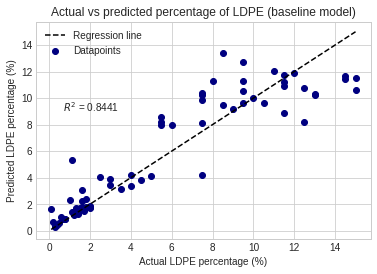

0.8440508320666702

In [15]:
# RF came out the best 
# RF regression BASELINE
# RF in sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

# plot actual vs predicted values 

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
#fig, ax = plt.subplots()
plt.scatter(Y_test, predictions, label = 'Datapoints', color = 'navy')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--',label= 'Regression line')
r2 = r2_score(Y_test, predictions)
plt.xlabel('Actual LDPE percentage (%)')
plt.ylabel('Predicted LDPE percentage (%)')
# r2 annotation: https://stackoverflow.com/questions/59829077/how-to-display-r-squared-value-on-my-graph-in-python
plt.title('Actual vs predicted percentage of LDPE (baseline model)')
plt.annotate("$R^2$ = {:.4f}".format(r2_score(Y_test, predictions)), (0.7, 9))
plt.legend()
## R2 supercsript: all within $$ sign with ^ for supercript 2 annotation; see $R^2$

# save plot
plt.savefig("LDPE baseline RF", dpi=500) # set high dpi for best plot quality 
plt.show()

r2


In [16]:
# performance metrics 
# BASELINE

from sklearn import metrics 

# MAE
print("MAE")
print(metrics.mean_absolute_error(Y_test, predictions))

# MSE
print("MSE")
print(metrics.mean_squared_error(Y_test, predictions))

# RMSE 
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE
1.2696521739130433
MSE
3.3996905507246375
RMSE
1.8438249783329863


In [17]:
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
train_sizes, train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(), X = X_train, y = Y_train, train_sizes = train_size, cv = 5, scoring ='neg_mean_squared_error')

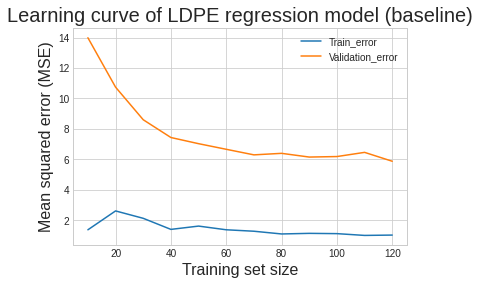

In [18]:
# Generating the Learning_Curve
train_scores_mean =-train_scores.mean(axis =1)
validation_scores_mean =-validation_scores.mean(axis =1)
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
plt.plot(train_sizes, train_scores_mean, label ='Train_error')
plt.plot(train_sizes, validation_scores_mean, label ='Validation_error')
plt.ylabel('Mean squared error (MSE)', fontsize =16)
plt.xlabel('Training set size', fontsize =16)
plt.title('Learning curve of LDPE regression model (baseline)', fontsize = 20, y =1)
plt.legend()
plt.savefig("LC_LDPEbase", dpi=500)

In [21]:
# tune the selected algorithm 
# guide for KNN regressor
# https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# parameters to choose:  
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([20,40, 60, 80, 100, 120, 140, 160, 180, 200]), 
                  max_depth=np.array([1, 2, 3, 4, 5, 6,7,8,9,10]),
                  min_samples_split=[2,4,6,8,10,12,14,16,18,20])
model = RandomForestRegressor()
kfold = KFold(n_splits=5, random_state=42) # small n_splits because the dataset is small
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


-12.564641 (3.883562) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 20}
-12.131330 (3.116404) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 40}
-12.505939 (3.783336) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 60}
-12.291216 (3.241909) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 80}
-12.192201 (3.338433) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
-12.300612 (3.343845) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 120}
-12.218584 (3.315223) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 140}
-12.367511 (3.379845) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 160}
-12.245819 (3.367472) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 180}
-12.121857 (3.258420) with: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 200}
-12.562197 (3.349848) with: {'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 20}
-12.379185 (3.4

In [22]:
# fit TUNED model 

from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model_tuned = RandomForestRegressor(max_depth=7, n_estimators=20, min_samples_split=6)
model_tuned = model_tuned.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions_tuned = model_tuned.predict(rescaled_X_test) 
print (mean_squared_error(Y_test, predictions_tuned))

3.39290776641191


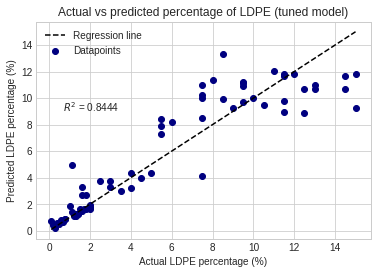

0.8443619690816598

In [23]:
# plot actual vs predicted values 
# TUNED model

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
#fig, ax = plt.subplots()
plt.scatter(Y_test, predictions_tuned, label = 'Datapoints', color = 'navy')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--',label= 'Regression line')
r2 = r2_score(Y_test, predictions_tuned)
plt.xlabel('Actual LDPE percentage (%)')
plt.ylabel('Predicted LDPE percentage (%)')
# r2 annotation: https://stackoverflow.com/questions/59829077/how-to-display-r-squared-value-on-my-graph-in-python
plt.title('Actual vs predicted percentage of LDPE (tuned model)')
plt.annotate("$R^2$ = {:.4f}".format(r2_score(Y_test, predictions_tuned)), (0.7, 9))
plt.legend()
## R2 supercsript: all within $$ sign with ^ for supercript 2 annotation; see $R^2$

# save plot
#plt.grid( which='major', color='#666666', linestyle='-')
plt.savefig("LDPE tuned RF", dpi=500) # set high dpi for best plot quality 
plt.show()

r2 

In [24]:
# performance metrics 
# TUNED

from sklearn import metrics 

# MAE
print("MAE")
print(metrics.mean_absolute_error(Y_test, predictions_tuned))

# MSE
print("MSE")
print(metrics.mean_squared_error(Y_test, predictions_tuned))

# RMSE 
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(Y_test, predictions_tuned)))

MAE
1.258792512593024
MSE
3.39290776641191
RMSE
1.8419847356620278


In [25]:
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
train_sizes, train_scores, validation_scores = learning_curve(estimator = KNeighborsRegressor(leaf_size=2, n_neighbors=5, p=2), X = X_train, y = Y_train, train_sizes = train_size, cv = 5, scoring ='neg_mean_squared_error')

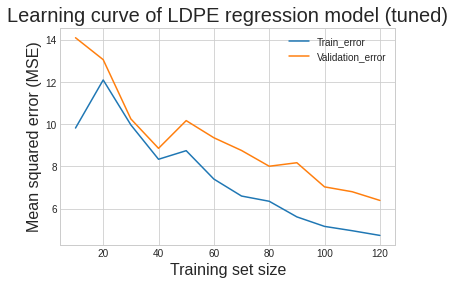

In [26]:
# Generating the Learning_Curve
train_scores_mean =-train_scores.mean(axis =1)
validation_scores_mean =-validation_scores.mean(axis =1)
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
plt.plot(train_sizes, train_scores_mean, label ='Train_error')
plt.plot(train_sizes, validation_scores_mean, label ='Validation_error')
plt.ylabel('Mean squared error (MSE)', fontsize =16)
plt.xlabel('Training set size', fontsize =16)
plt.title('Learning curve of LDPE regression model (tuned)', fontsize = 20, y =1) 
plt.legend() 
plt.savefig("LC_LDPEtuned", dpi=500)